In [3]:
import pandas as pd
data = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True, na_values=-99.99)

rets = data[['Lo 10', 'Hi 10']]
rets.columns = ['Smallcap', 'Largecap']
rets

,Smallcap,Largecap
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70
...,...,...
201808,2.41,2.34
201809,-1.68,0.87
201810,-10.02,-6.57
201811,-3.65,2.53


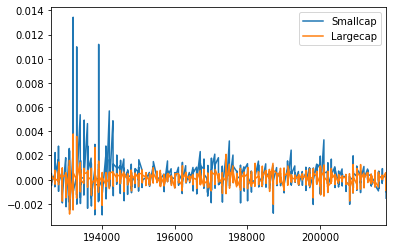

In [5]:
rets = rets/100
%matplotlib inline
rets.plot.line()

In [6]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [8]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets

,Smallcap,Largecap
1926-07-01,-0.000145,0.000329
1926-08-01,0.000512,0.000370
1926-09-01,0.000093,0.000067
1926-10-01,-0.000484,-0.000243
1926-11-01,-0.000078,0.000270
...,...,...
2018-08-01,0.000241,0.000234
2018-09-01,-0.000168,0.000087
2018-10-01,-0.001002,-0.000657
2018-11-01,-0.000365,0.000253


In [9]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [10]:
rets.index = rets.index.to_period('M')
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [11]:
rets['1926']

,Smallcap,Largecap
1926-07,-0.000145,0.000329
1926-08,0.000512,0.000370
1926-09,0.000093,0.000067
1926-10,-0.000484,-0.000243
1926-11,-0.000078,0.000270
1926-12,-0.000266,0.000301


## Compute drawdown
1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown- which is the wealth value as a percentage of the previous peak

In [18]:
#assume a capital of $1000
wealth_index = 1000*(1+rets['Largecap']).cumprod()

In [21]:
wealth_index.head()

1926-07    1000.329000
1926-08    1000.699122
1926-09    1000.766169
1926-10    1000.522982
1926-11    1000.793124
Freq: M, Name: Largecap, dtype: float64

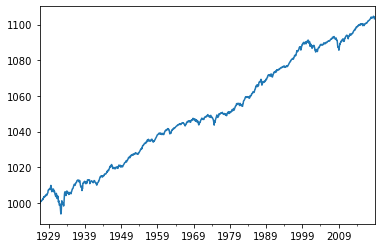

In [25]:
%matplotlib inline
wealth_index.plot()

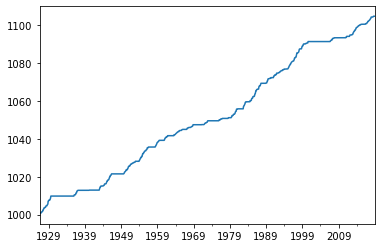

In [24]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

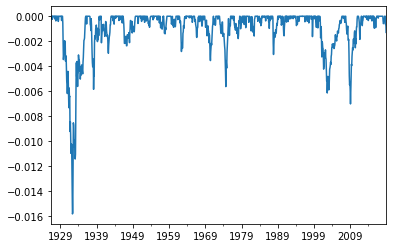

In [27]:
drawdown = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [28]:
drawdown.head()

1926-07    0.000000
1926-08    0.000000
1926-09    0.000000
1926-10   -0.000243
1926-11    0.000000
Freq: M, Name: Largecap, dtype: float64

In [29]:
drawdown.min()

-0.015847287938135644

In [30]:
drawdown.max()

0.0

In [34]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [35]:
drawdown.idxmin()

Period('1932-05', 'M')

In [38]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a Dataframe that contains:
    the wealth index
    previous peaks
    percent drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown': drawdown
    })


In [39]:
drawdown(rets['Largecap']).head()

,Wealth,Peaks,Drawdown
1926-07,1000.329000,1000.329000,0.000000
1926-08,1000.699122,1000.699122,0.000000
1926-09,1000.766169,1000.766169,0.000000
1926-10,1000.522982,1000.766169,-0.000243
1926-11,1000.793124,1000.793124,0.000000


In [40]:
drawdown(rets['Largecap'])[['Wealth', 'Peaks']].head()

,Wealth,Peaks
1926-07,1000.329000,1000.329000
1926-08,1000.699122,1000.699122
1926-09,1000.766169,1000.766169
1926-10,1000.522982,1000.766169
1926-11,1000.793124,1000.793124


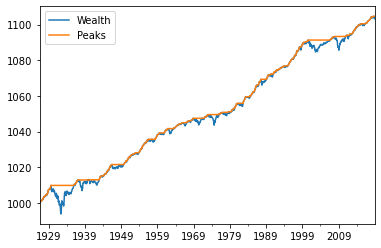

In [41]:
drawdown(rets['Largecap'])[['Wealth', 'Peaks']].plot()

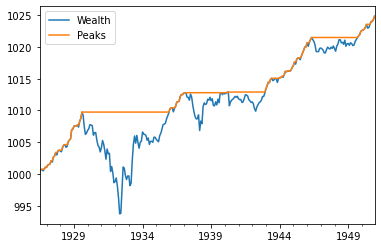

In [47]:
drawdown(rets[:'1950']['Largecap'])[['Wealth', 'Peaks']].plot()

In [43]:
drawdown(rets['Largecap'])['Drawdown'].min()

-0.015847287938135644

In [44]:
drawdown(rets['Smallcap'])['Drawdown'].min()

-0.014016694412439313

In [45]:
drawdown(rets['Largecap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [46]:
drawdown(rets['Smallcap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [49]:
drawdown(rets['1940':]['Largecap'])['Drawdown'].min()

-0.0070274334962884336

In [50]:
drawdown(rets['1940':]['Largecap'])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [51]:
drawdown(rets['1940':]['Smallcap'])['Drawdown'].min()

-0.009661509208831133

In [52]:
drawdown(rets['1940':]['Smallcap'])['Drawdown'].idxmin()

Period('1974-12', 'M')

In [53]:
drawdown(rets['1975':]['Largecap'])['Drawdown'].min()

-0.007027433496288399

In [54]:
drawdown(rets['1975':]['Largecap'])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [55]:
drawdown(rets['1975':]['Smallcap'])['Drawdown'].min()

-0.00925406854557148

In [56]:
drawdown(rets['1975':]['Smallcap'])['Drawdown'].idxmin()

Period('2009-02', 'M')